In [1]:
%load_ext autoreload
%autoreload 2
import Simulator.simulator as simulator
import Strategies.BestPos as BestPos
import Simulator.get_info as get_info
import Simulator.load_data as load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../data/data_btc/'
run_time = pd.Timedelta(10, 'm').value

In [2]:
reload(simulator)
reload(BestPos)
reload(get_info)
reload(load_data)

<module 'Simulator.load_data' from 'c:\\Users\\Admin\\Desktop\\HFT\\Paper tasks 1\\hft_\\Simulator\\load_data.py'>

In [3]:
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [4]:
latency = pd.Timedelta(10, 'ms').value
md_latency = pd.Timedelta(10, 'ms').value

sim = simulator.Sim(md, latency, md_latency)

In [5]:
delay = pd.Timedelta(0.1, 's').value
hold_time = pd.Timedelta(10, 's').value

In [6]:
strategy = BestPos.BestPosStrategy(delay, hold_time)

In [7]:
trades_list, md_list, updates_list, all_orders = strategy.run(sim)

In [8]:
df = get_info.get_pnl(updates_list)
PnL = df.total
dt = pd.to_datetime(df.receive_ts)

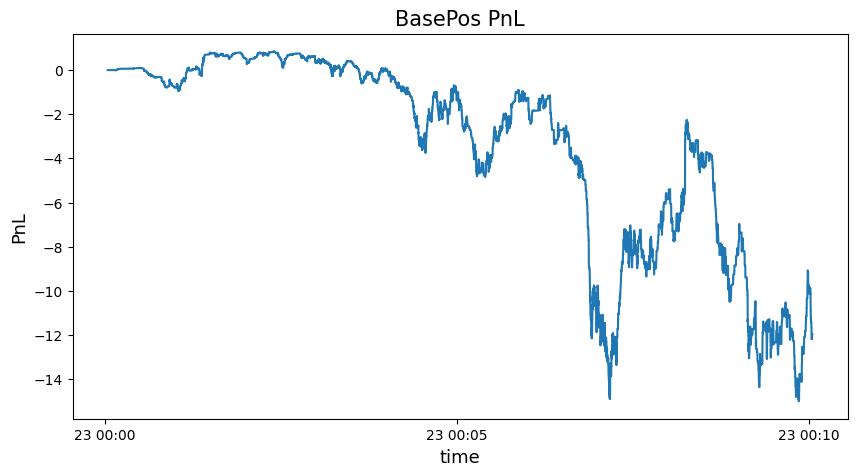

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("BasePos PnL", fontsize=15)
plt.show()